In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import sem

In [3]:
# reading file content
df = pd.read_csv('../Project1-Challenge-main/Resources/cleaned_df.csv')

### Exploring the Cleaning

In [4]:
# The structure of the dataset
df.info()
# total 10 columns. All non-null, 307122 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307122 entries, 0 to 307121
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dateCrawled         307122 non-null  object
 1   name                307122 non-null  object
 2   price               307122 non-null  int64 
 3   vehicleType         307122 non-null  object
 4   yearOfRegistration  307122 non-null  int64 
 5   model               307122 non-null  object
 6   kilometer           307122 non-null  int64 
 7   fuelType            307122 non-null  object
 8   brand               307122 non-null  object
 9   lastSeen            307122 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.4+ MB


In [5]:
df.describe()

# Interquartile distribution doesn`t seem satisfactory for now.

,price,yearOfRegistration,kilometer
count,3.071220e+05,307122.000000,307122.000000
mean,9.404320e+03,2002.903706,125391.180052
std,5.192426e+05,6.597030,39347.308065
min,0.000000e+00,1910.000000,5000.000000
25%,1.399000e+03,1999.000000,100000.000000
50%,3.450000e+03,2003.000000,150000.000000
75%,7.980000e+03,2007.000000,150000.000000
max,1.000000e+08,2018.000000,150000.000000


In [6]:
# Getting the dimensions
df.shape

(307122, 10)

In [7]:
# Renaming dateCrawled to offeringDate
df.rename(columns={'dateCrawled': 'offeringDate'}, inplace=True)
# Listing out the columns
df.columns

Index(['offeringDate', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'model', 'kilometer', 'fuelType', 'brand', 'lastSeen'],
      dtype='object')

In [8]:
df.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39


Some entries for vehicleType are in German, converting them to English. 

In [9]:
df['vehicleType'] = df['vehicleType'].replace({'andere' : 'other','kombi' : 'station','kleinwagen': 'sedan',
                                               'cabrio': 'convertable','limousine': 'luxury'})
df.vehicleType.unique()


array(['suv', 'sedan', 'luxury', 'convertable', 'bus', 'station', 'coupe',
       'other'], dtype=object)

In [10]:
# Duplicates
 
duplicate_rows = df[df.duplicated()]

duplicate_rows # I don`t think there is a need to drop as they are not too much. 

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
129403,2016-03-07 12:00:46,Golf_7_Variant__184_PS__Erstzulassung_2013__53...,10000,station,2013,golf,60000,diesel,volkswagen,2016-03-20 12:49:27
148340,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,1799,coupe,1999,clk,20000,benzin,mercedes_benz,2016-03-09 09:46:57
200383,2016-03-28 00:56:10,Suzuki_Ignis,1000,sedan,2002,andere,150000,benzin,suzuki,2016-03-28 08:46:21
223758,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,4699,coupe,2003,clk,125000,benzin,mercedes_benz,2016-04-07 09:44:54
282289,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,1999,station,2001,passat,150000,diesel,volkswagen,2016-03-18 18:46:15


## Research Questions to Answer

## -How much does mileage affect the car price?

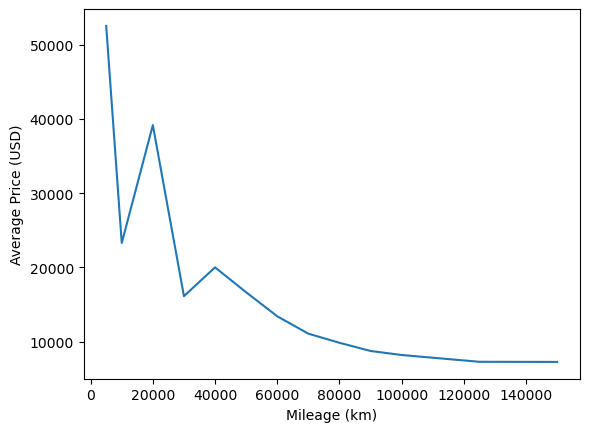

In [52]:
# group by kilometer and price. 
grouped_df = df.groupby('kilometer')['price'].mean()

# Mileage vs Average Price Visualized in Line Chart
plt.plot(grouped_df)
plt.xlabel('Mileage (km)')
plt.ylabel('Average Price (USD)')
plt.show()

#### Number of sales vs mileage

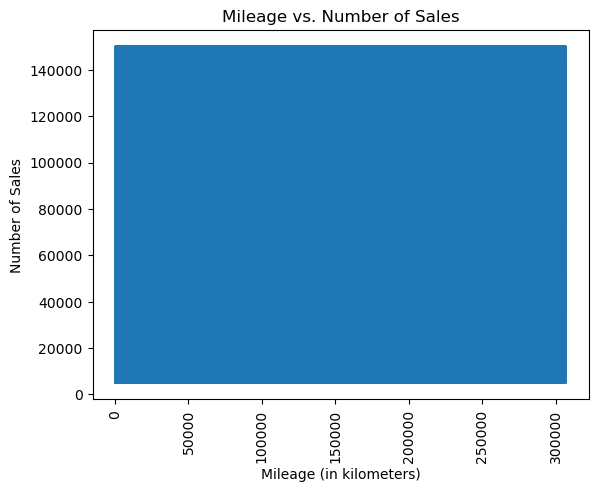

In [53]:
mileage_Sales_Count = df.groupby(['kilometer'])['price'].count()
# Create a count plot to visualize the number of sales based on mileage
plt.plot(df['kilometer'])
plt.xlabel('Mileage (in kilometers)')
plt.ylabel('Number of Sales')
plt.title('Mileage vs. Number of Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()